In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [2]:
# Laad de sentiment CSV in een DataFrame
df = pd.read_csv('Preprocessed_airbnblistings_ExternalFeatures.csv', index_col=0)

pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)

In [3]:
print(f"Nightly advertised prices range from £{min(df.price)} to £{max(df.price)}.")

Nightly advertised prices range from £0.0 to £80000.0.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93475 entries, 0 to 93474
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             93475 non-null  int64  
 1   source                         93475 non-null  object 
 2   host_since                     93475 non-null  object 
 3   host_response_time             93475 non-null  object 
 4   host_response_rate             93475 non-null  object 
 5   host_acceptance_rate           93475 non-null  object 
 6   host_is_superhost              93475 non-null  float64
 7   host_listings_count            93475 non-null  float64
 8   host_has_profile_pic           93475 non-null  float64
 9   host_identity_verified         93475 non-null  float64
 10  neighbourhood_cleansed         93475 non-null  object 
 11  latitude                       93475 non-null  float64
 12  longitude                      93475 non-null 

In [12]:
df_price = df.dropna(subset=['price'])

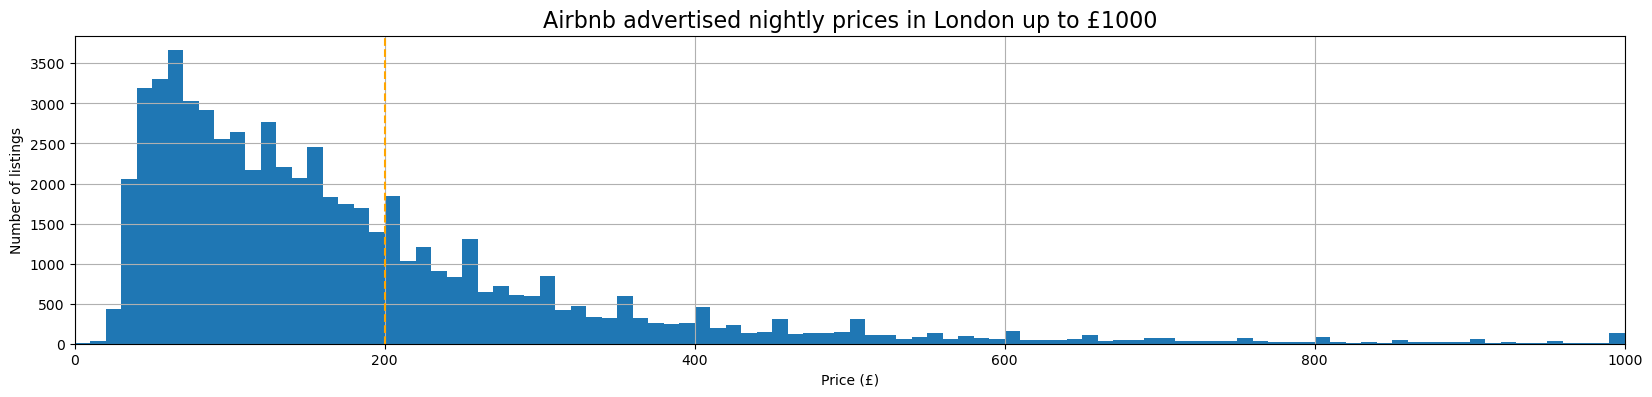

In [13]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df_price.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in London up to £1000", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

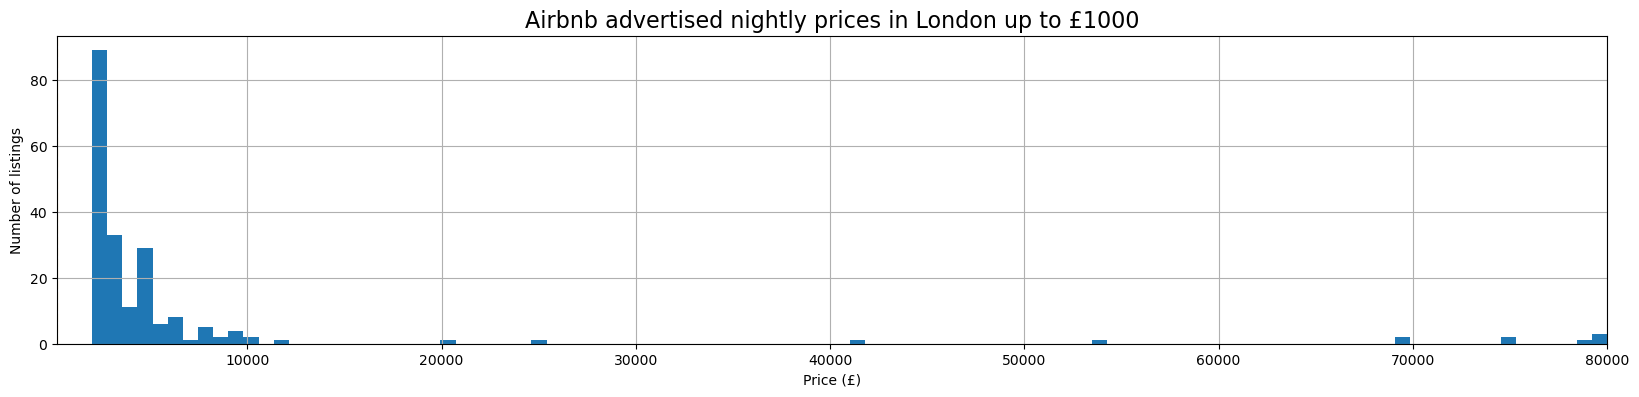

In [14]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df_price.price.hist(bins=100, range=(2000,80000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in London up to £1000", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

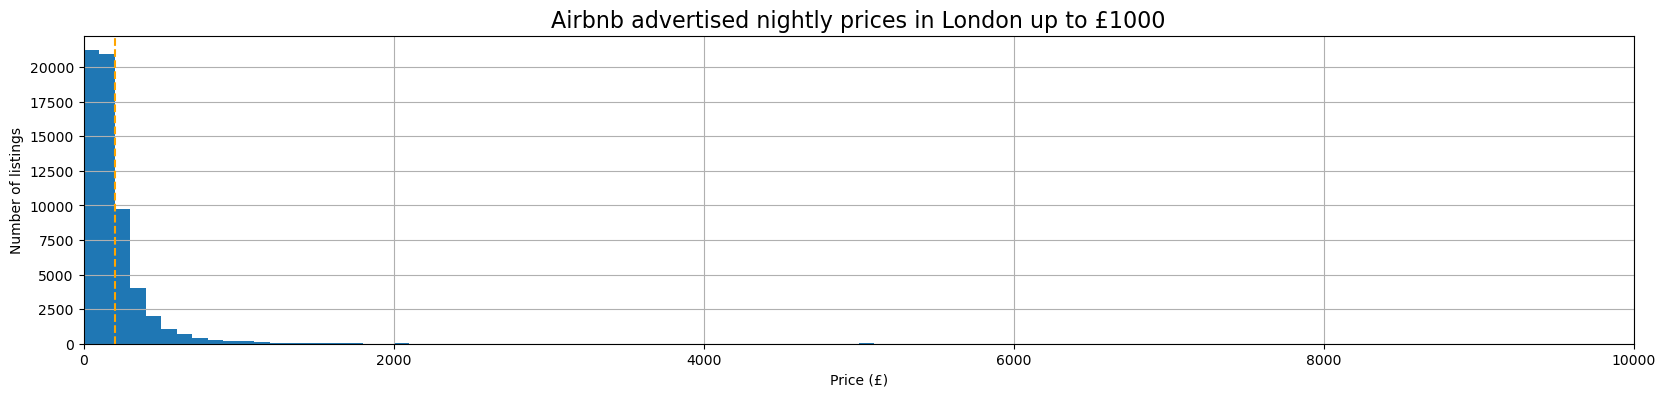

In [15]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df_price.price.hist(bins=100, range=(0,10000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in London up to £1000", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

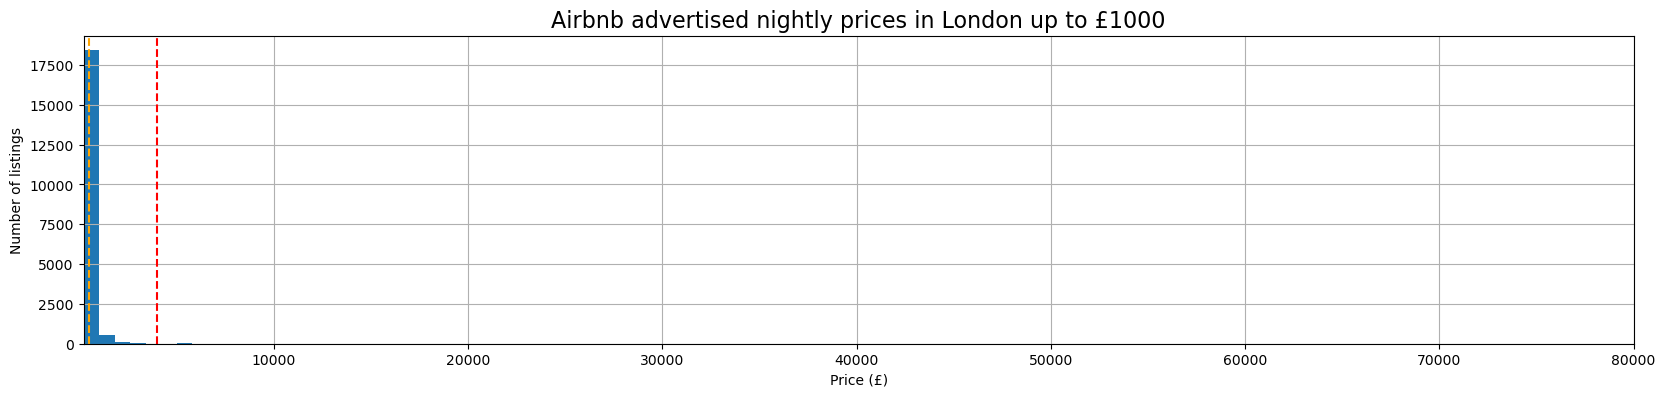

In [16]:
# Distribution of prices from £200 upwards
plt.figure(figsize=(20,4))
df_price.price.hist(bins=100, range=(200, max(df.price)))
plt.margins(x=0)
plt.axvline(500, color='orange', linestyle='--')
plt.axvline(4000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in London up to £1000", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

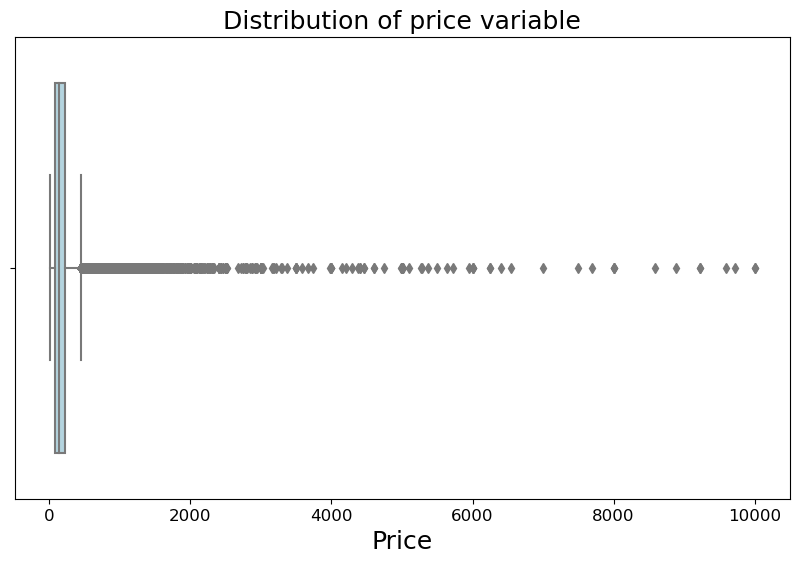

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stel dat 'price' de feature is
#price_without_outliers = df_price[df_price['price'] < df_price['price'].quantile(0.95)]


plt.figure(figsize=(10, 6))
#plt.xlim(df_price['price'].quantile(0.001), df_price['price'].quantile(0.999))
sns.boxplot(x=df_price['price'], color='lightblue')
plt.title('Distribution of price variable', fontsize=18)
plt.xlabel('Price', fontsize=18)  # X-as label (prijs)
#plt.ylabel('Frequency')  # Y-as label (aantal observaties)
#plt.axvline(10000, color='red', linestyle='--')
plt.tick_params(axis='x', labelsize=12)  # Verander de grootte van de x-tick labels
plt.tick_params(axis='y', labelsize=12)  # Verander de grootte van de y-tick labels
plt.savefig('boxplot_price_London_new.png', format='png', dpi=300)  # opslaan als PNG-bestand met hoge resolutie (300 dpi)
plt.show()



In [11]:
top_10_prijzen_alleen = df_price['price'].nlargest(800)
print(top_10_prijzen_alleen)

2220     80000.0
39733    80000.0
42951    80000.0
53418    78679.0
54518    75000.0
          ...   
90749     1000.0
2884       999.0
8106       999.0
13474      999.0
16775      999.0
Name: price, Length: 800, dtype: float64


In [18]:
df_price = df_price[(df_price['price'] > 9) & (df['price'] <= 10000)]


/var/folders/fq/xh8x9gf14z1b3lll7bmksxh80000gn/T/ipykernel_4921/1420920617.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_price = df_price[(df_price['price'] > 9) & (df['price'] <= 10000)]


In [37]:
top_10_prijzen_alleen = df_price['price'].nlargest(200)
print(top_10_prijzen_alleen)

78353    10000.0
67596     9999.0
22045     9724.0
76135     9592.0
16994     9224.0
          ...   
35918     1960.0
1896      1951.0
52536     1950.0
60207     1950.0
37198     1919.0
Name: price, Length: 200, dtype: float64


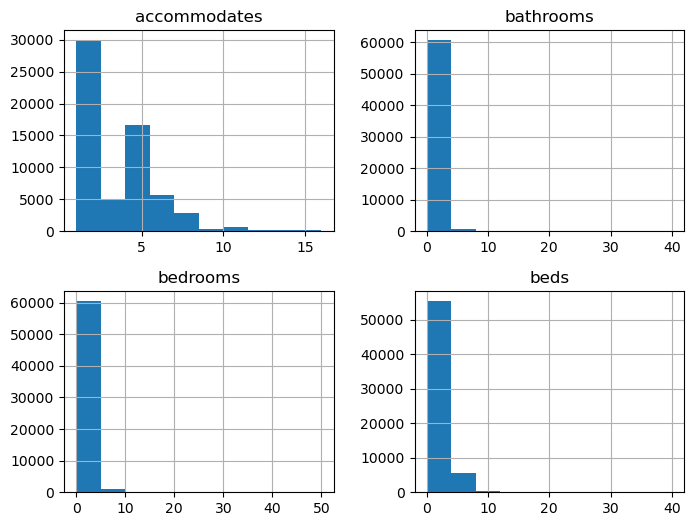

In [14]:
df_price[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));


In [15]:
df_price.describe()

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,weighted_sentiment,total_distance_to_attractions
count,6.140100e+04,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,6.140100e+04,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000,61401.000000
mean,6.519658e+17,0.241853,30.835068,0.949708,0.923438,51.509352,-0.128582,3.410335,1.369310,1.533298,1.642579,197.659989,5.168971,8.996990e+03,47.622303,23.369717,0.327014,2390.664191,0.685396,0.780427,0.380075,0.650266,0.804059,0.172326,0.532255,0.266934,0.193873,0.926044,0.460302,0.130177,0.254866,0.408625,0.686553,24.442419
std,4.628646e+17,0.428209,158.790503,0.218549,0.265898,0.049779,0.104553,2.136318,0.754466,1.045186,1.509331,283.802861,18.315024,2.118126e+06,29.302364,52.762336,0.469126,1346.548384,0.464362,0.413961,0.485409,0.476890,0.396927,0.377667,0.498963,0.442361,0.395334,0.261702,0.498426,0.336501,0.435789,0.491584,0.592318,14.656226
min,1.391300e+04,0.000000,1.000000,0.000000,0.000000,51.295937,-0.497800,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.693147,3.247851
25%,4.634379e+07,0.000000,1.000000,1.000000,1.000000,51.484320,-0.191375,2.000000,1.000000,1.000000,1.000000,78.000000,1.000000,9.000000e+01,22.000000,1.000000,0.000000,1096.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.704909
50%,8.464188e+17,0.000000,3.000000,1.000000,1.000000,51.513366,-0.131783,3.000000,1.000000,1.000000,1.000000,138.000000,2.000000,3.650000e+02,48.000000,6.000000,0.000000,2587.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.639355,21.220865
75%,1.046971e+18,0.000000,12.000000,1.000000,1.000000,51.538320,-0.068840,4.000000,1.500000,2.000000,2.000000,226.000000,4.000000,3.650000e+02,74.000000,23.000000,1.000000,3439.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.123167,31.768026
max,1.178199e+18,1.000000,2566.000000,1.000000,1.000000,51.681642,0.295731,16.000000,40.000000,50.000000,40.000000,10000.000000,999.000000,5.248556e+08,90.000000,1678.000000,1.000000,5853.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.150934,92.694682


In [16]:
print("Median number of listings per host:", int(df_price.host_listings_count.median()))
print("Mean number of listings per host:", int(round(df_price.host_listings_count.mean())))
print(f"{int(round(100*len(df[df.host_listings_count == 1])/len(df_price)))}% of listings are from hosts with one listing.")

Median number of listings per host: 3
Mean number of listings per host: 31
68% of listings are from hosts with one listing.


In [17]:
top_10_prijzen_alleen = df_price['minimum_nights'].nlargest(100)
print(top_10_prijzen_alleen)

5767     999
11326    999
17747    999
68779    600
74068    600
6972     500
2128     400
64690    400
1222     365
2099     365
2247     365
5582     365
12558    365
18343    365
19158    365
19743    365
19891    365
21913    365
24598    365
26898    365
33091    365
38839    365
40750    365
41126    365
41456    365
42361    365
53992    365
56772    365
78588    365
78724    365
87758    365
89604    365
4775     364
21552    364
34673    364
88106    364
77901    363
1297     360
1611     360
4835     360
11170    360
19493    360
40586    360
49346    360
49708    360
52392    360
59116    360
66328    360
73076    360
76112    360
76484    360
76509    360
76558    360
77287    360
77414    360
79027    360
79044    360
79056    360
79194    360
88026    360
89284    360
5489     350
89108    340
37965    300
45202    300
729      280
77145    280
55990    277
59107    277
74165    277
22594    270
29644    270
47387    270
83060    258
2277     255
637      250
38254    250

In [18]:
numerical_columns = ['accommodates', 'availability_90', 'bathrooms', 'cleaning_fee', 'extra_people', 'host_days_active', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit']

In [19]:
df_price = df_price[df_price['maximum_nights'] != 524855552]

In [20]:
df_price = df_price[df_price['maximum_nights'] != 9011]

In [21]:
df_price['minimum_nights'] = df_price['minimum_nights'].clip(upper=365)


In [22]:
# List of the largest host_listings_count and the year the host joined Airbnb
df_price.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]

,host_since,host_listings_count
62413,2023-06-14,464.0
9744,2015-03-05,494.0
30329,2023-07-18,592.0
83774,2015-05-21,963.0
13738,2018-03-06,1023.0
51463,2018-06-08,1112.0
77400,2019-01-23,1253.0
11120,2019-11-20,1300.0
44477,2018-10-23,1630.0
15606,2022-01-05,2566.0


In [23]:
df_price.drop(['host_since'], axis=1, inplace=True)


In [24]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df_price[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

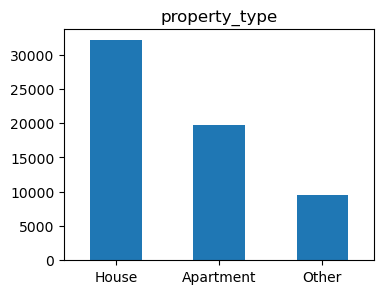

House        0.522728
Apartment    0.321699
Other        0.155573
Name: property_type, dtype: float64


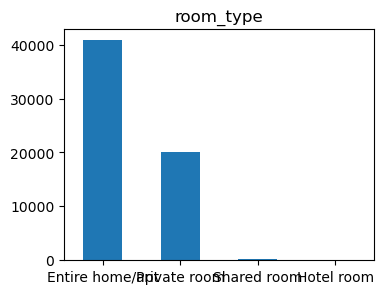

Entire home/apt    0.664848
Private room       0.328393
Shared room        0.004577
Hotel room         0.002182
Name: room_type, dtype: float64


In [25]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(df_price[col].value_counts(normalize=True))

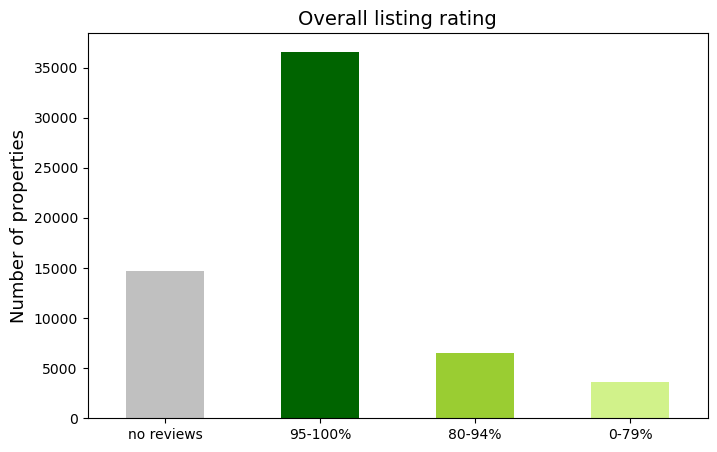

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
df_price['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a' ], ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

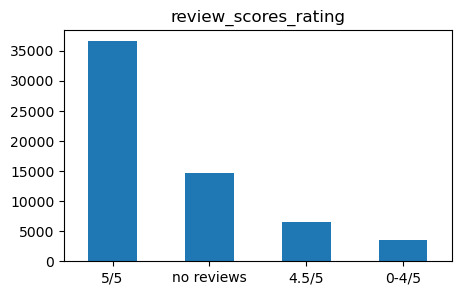

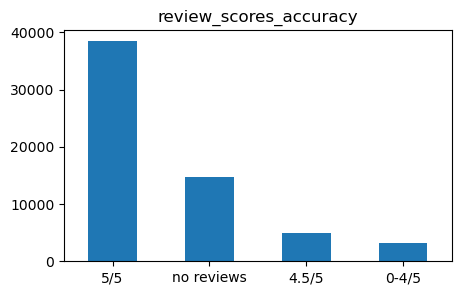

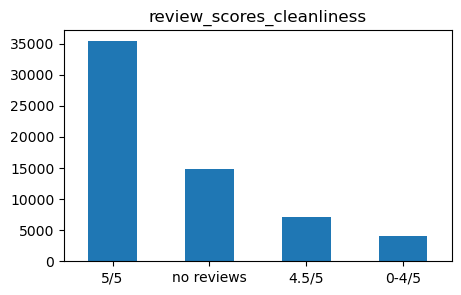

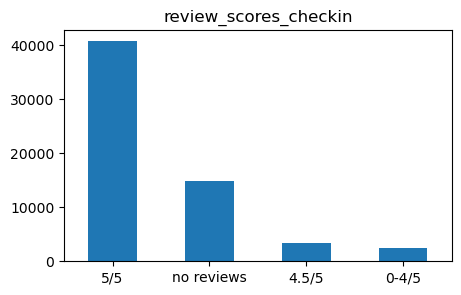

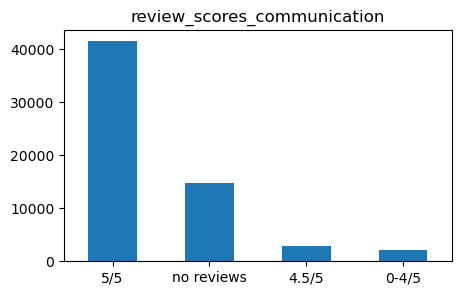

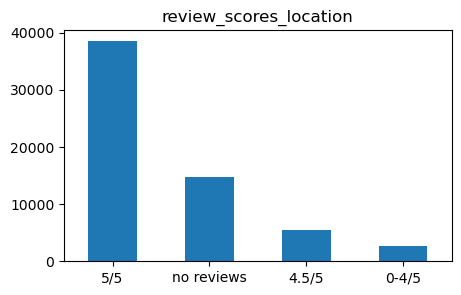

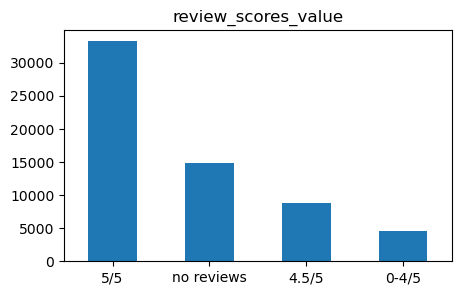

In [27]:
for col in list(df_price.columns[df_price.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

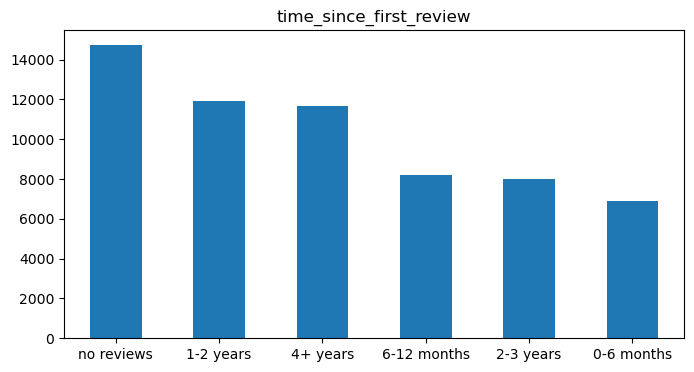

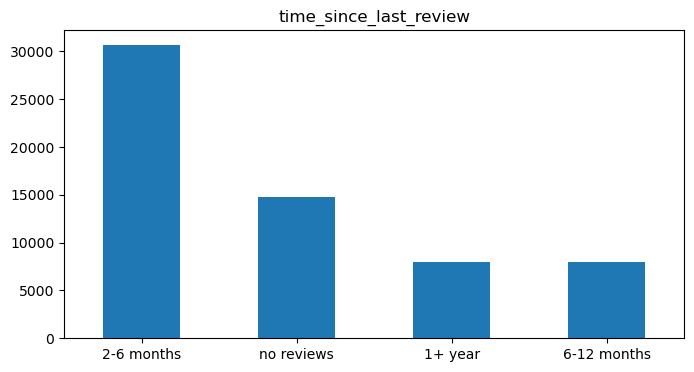

In [28]:
for col in ['time_since_first_review', 'time_since_last_review']:
    category_count_plot(col)

In [29]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df_price.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df_price.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price (£)')
    ax2.set_xlabel('')
    
    plt.show()


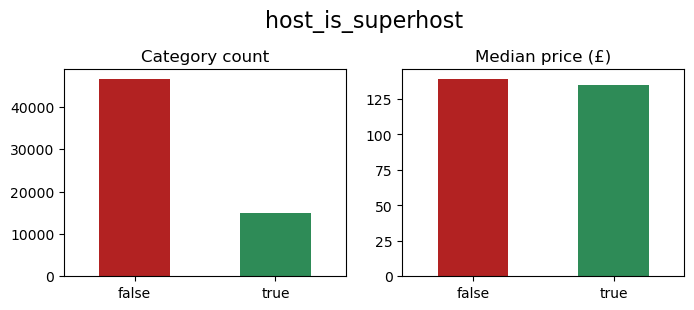

0.0    0.758139
1.0    0.241861
Name: host_is_superhost, dtype: float64


In [30]:
binary_count_and_price_plot('host_is_superhost')
print(df_price.host_is_superhost.value_counts(normalize=True))

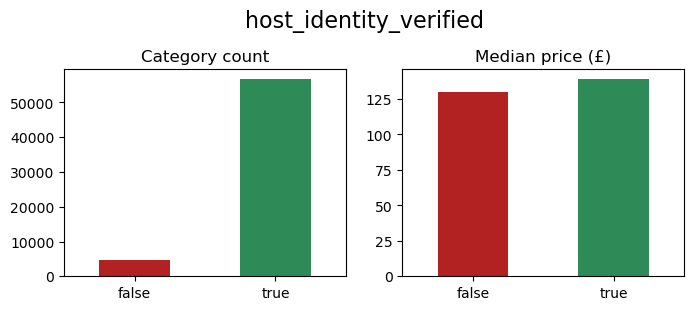

In [31]:
df_price.host_identity_verified.value_counts(normalize=True)
binary_count_and_price_plot('host_identity_verified')

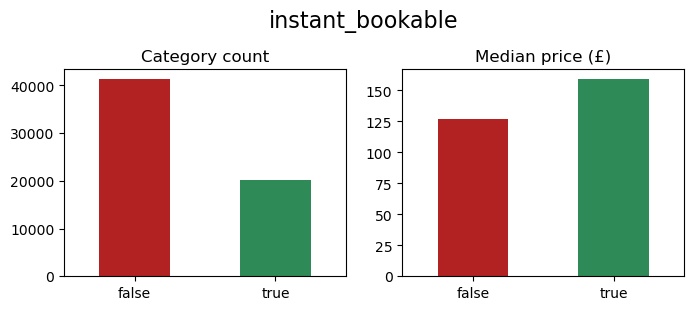

0    0.673008
1    0.326992
Name: instant_bookable, dtype: float64


In [32]:
binary_count_and_price_plot('instant_bookable')
print(df_price.instant_bookable.value_counts(normalize=True))

In [33]:
df_price.describe()

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,weighted_sentiment,total_distance_to_attractions
count,6.139900e+04,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000,61399.000000
mean,6.519871e+17,0.241861,30.835991,0.949706,0.923435,51.509355,-0.128577,3.410381,1.369322,1.533315,1.642600,197.664669,5.127087,448.861024,47.622681,23.364468,0.326992,2390.611981,0.685386,0.780436,0.380071,0.650271,0.804068,0.172332,0.532240,0.266942,0.193879,0.926041,0.460301,0.130181,0.254874,0.408639,0.686515,24.441646
std,4.628572e+17,0.428214,158.793006,0.218553,0.265902,0.049777,0.104551,2.136330,0.754475,1.045198,1.509351,283.806260,16.836491,396.040992,29.302046,52.751873,0.469118,1346.533589,0.464366,0.413955,0.485408,0.476888,0.396919,0.377672,0.498964,0.442366,0.395339,0.261706,0.498426,0.336506,0.435794,0.491586,0.592285,14.655797
min,1.391300e+04,0.000000,1.000000,0.000000,0.000000,51.295937,-0.497800,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.693147,3.247851
25%,4.634709e+07,0.000000,1.000000,1.000000,1.000000,51.484321,-0.191370,2.000000,1.000000,1.000000,1.000000,78.000000,1.000000,90.000000,22.000000,1.000000,0.000000,1096.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.703820
50%,8.464299e+17,0.000000,3.000000,1.000000,1.000000,51.513367,-0.131780,3.000000,1.000000,1.000000,1.000000,138.000000,2.000000,365.000000,48.000000,6.000000,0.000000,2587.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.639335,21.220518
75%,1.046973e+18,0.000000,12.000000,1.000000,1.000000,51.538320,-0.068836,4.000000,1.500000,2.000000,2.000000,226.000000,4.000000,365.000000,74.000000,23.000000,1.000000,3439.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.123108,31.767028
max,1.178199e+18,1.000000,2566.000000,1.000000,1.000000,51.681642,0.295731,16.000000,40.000000,50.000000,40.000000,10000.000000,365.000000,1825.000000,90.000000,1678.000000,1.000000,5853.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.150934,92.694682


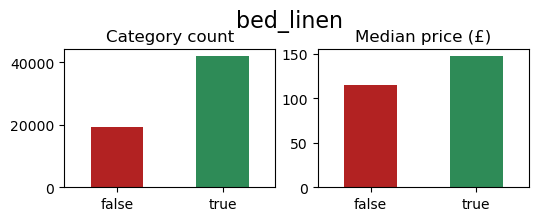

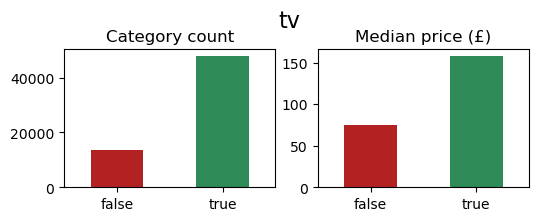

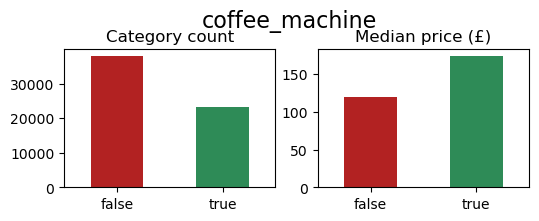

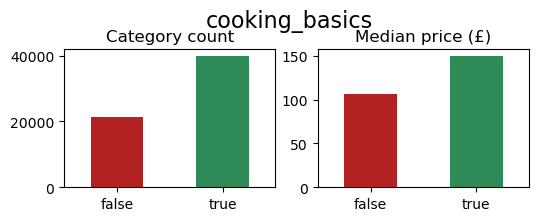

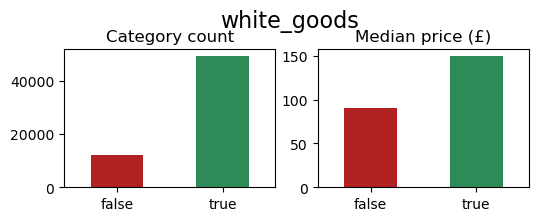

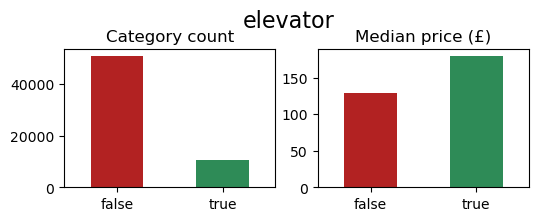

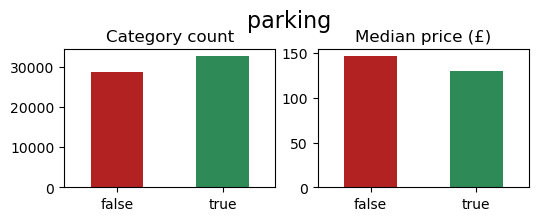

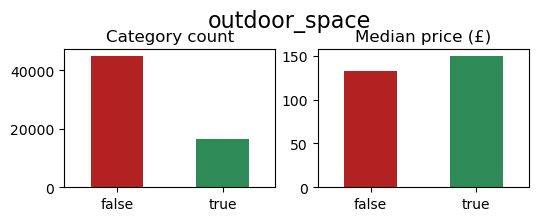

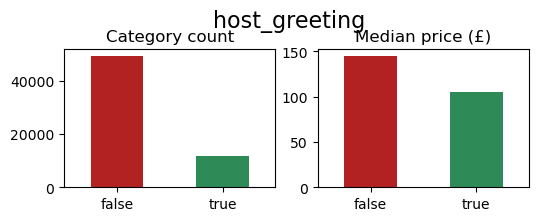

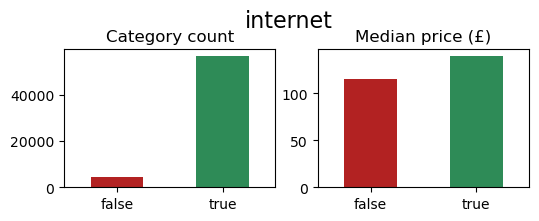

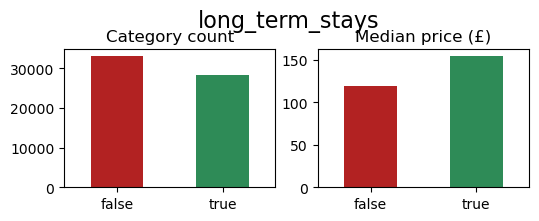

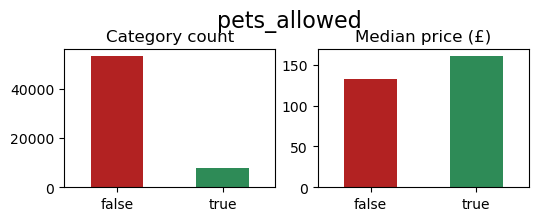

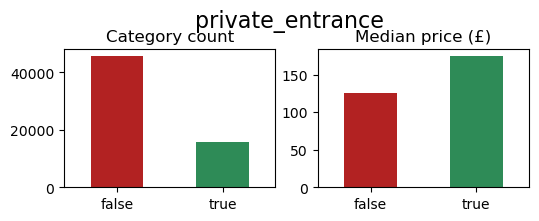

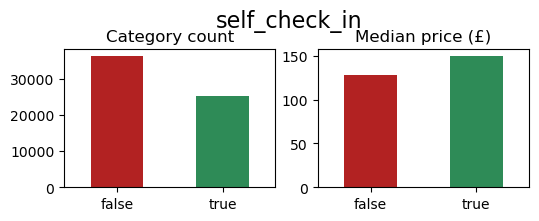

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (2).

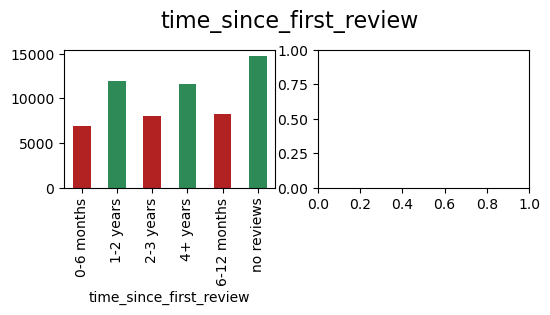

In [34]:
for col in df_price.iloc[:,32:-2].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

In [35]:
numerical_columns = ['accommodates', 'availability_90', 'bathrooms','bedrooms','beds','host_days_active', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price']

In [36]:
top_10_prijzen_kamers = df_price['accommodates'].nlargest(1000)
print(top_10_prijzen_kamers)

1411     16
1460     16
1970     16
1978     16
5695     16
         ..
71665    10
71673    10
71941    10
72258    10
72363    10
Name: accommodates, Length: 1000, dtype: int64


In [37]:
df_price = df_price[(df['bathrooms'] <= 10)]


/var/folders/fq/xh8x9gf14z1b3lll7bmksxh80000gn/T/ipykernel_90361/2532098174.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_price = df_price[(df['bathrooms'] <= 10)]


In [38]:
df_price = df_price[(df['bedrooms'] <= 20)]


/var/folders/fq/xh8x9gf14z1b3lll7bmksxh80000gn/T/ipykernel_90361/1347978963.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_price = df_price[(df['bedrooms'] <= 20)]


In [39]:
df_price = df_price[(df['beds'] <= 20)]


/var/folders/fq/xh8x9gf14z1b3lll7bmksxh80000gn/T/ipykernel_90361/2886610928.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_price = df_price[(df['beds'] <= 20)]


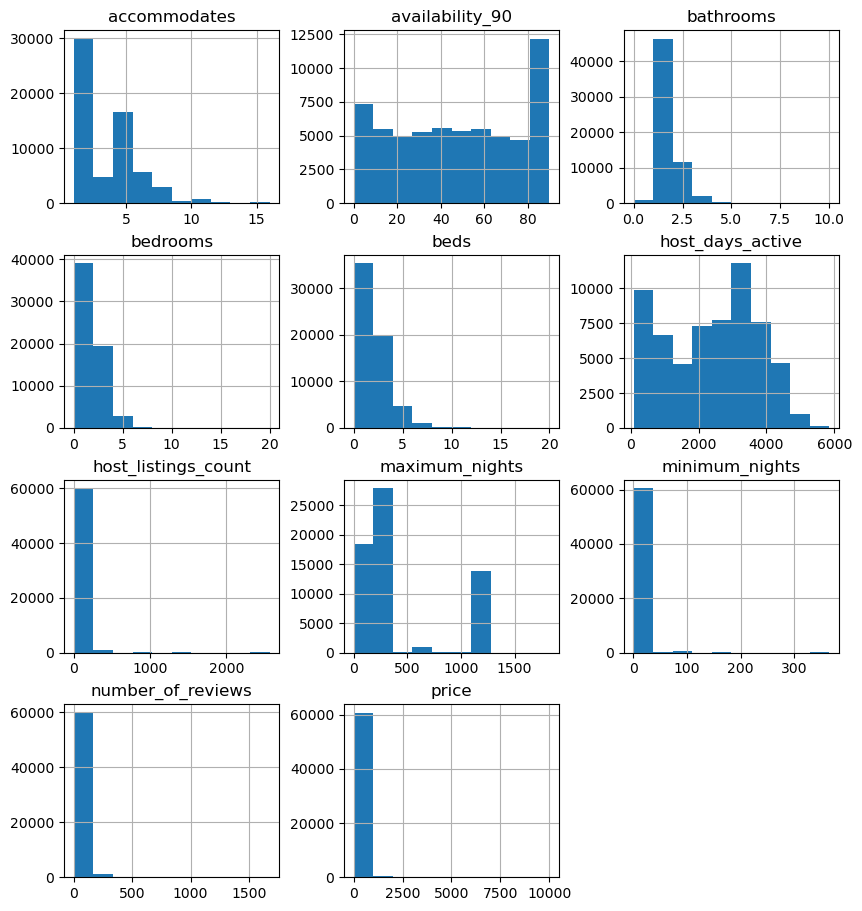

In [40]:
df_price[numerical_columns].hist(figsize=(10,11));

In [41]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61375 entries, 0 to 93474
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             61375 non-null  int64  
 1   source                         61375 non-null  object 
 2   host_response_time             61375 non-null  object 
 3   host_response_rate             61375 non-null  object 
 4   host_acceptance_rate           61375 non-null  object 
 5   host_is_superhost              61375 non-null  float64
 6   host_listings_count            61375 non-null  float64
 7   host_has_profile_pic           61375 non-null  float64
 8   host_identity_verified         61375 non-null  float64
 9   neighbourhood_cleansed         61375 non-null  object 
 10  latitude                       61375 non-null  float64
 11  longitude                      61375 non-null  float64
 12  property_type                  61375 non-null 

In [42]:
# Exporteren naar CSV-bestand
df_price.to_csv('Preprocessed_airbnblistings_ExternalFeatures_outlierdetected.csv', index=True)

# Controleer of het bestand correct is opgeslagen
print("Preprocessed_airbnblistings_ExternalFeatures scores zijn opgeslagen in Preprocessed_airbnblistings_ExternalFeatures.csv")

Preprocessed_airbnblistings_ExternalFeatures scores zijn opgeslagen in Preprocessed_airbnblistings_ExternalFeatures.csv
